# Time-Series : (seq2seq)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BTC.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-09,361.894989,363.066986,344.950989,352.218994,352.218994,32915500
2014-12-10,352.204987,352.384003,346.364990,346.364990,346.364990,16427700
2014-12-11,344.339996,361.356995,338.763000,350.506012,350.506012,32431300
2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800
2014-12-13,352.381012,352.381012,346.588013,347.376007,347.376007,11675900
2014-12-14,346.726990,353.316010,345.417999,351.631989,351.631989,12415200
2014-12-15,351.360992,351.815002,344.933990,345.345001,345.345001,17264200
2014-12-16,345.673004,345.859009,327.062012,327.062012,327.062012,30864900
2014-12-17,326.855011,333.954010,315.152008,319.776001,319.776001,37567900


In [3]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-11,70575.734375,71256.234375,69571.812500,70060.609375,70060.609375,30153382941
2024-04-12,70061.382813,71222.742188,65254.835938,67195.867188,67195.867188,44129299406
2024-04-13,67147.718750,67888.078125,65898.859375,66972.726563,66972.726563,35151609856


In [4]:
len(df)

3414

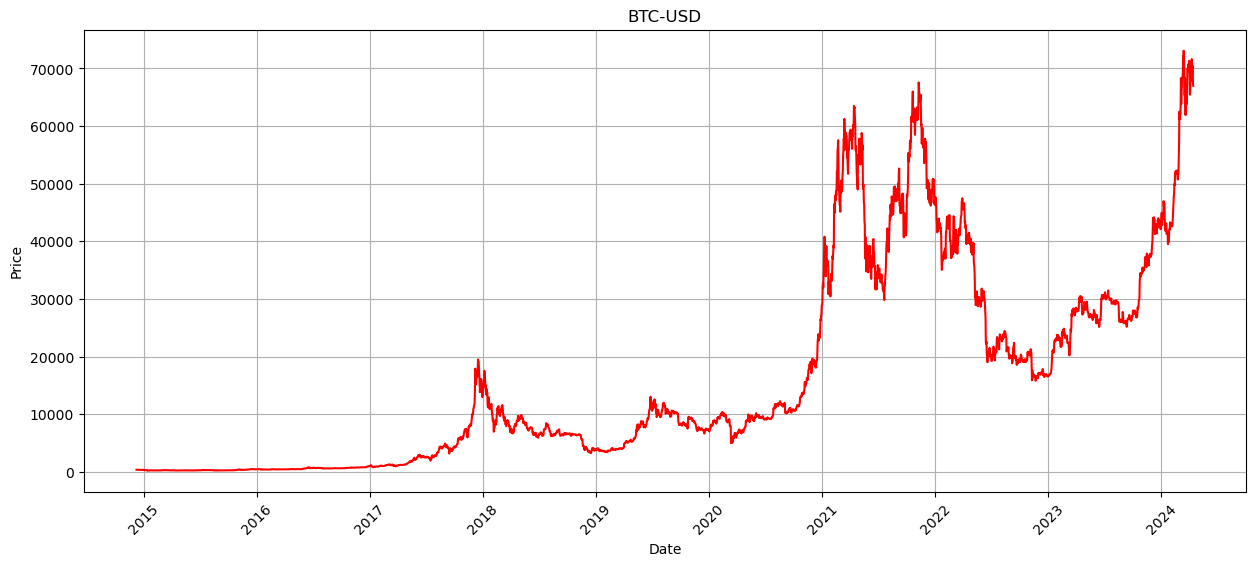

In [5]:
plt.figure(figsize=(15, 6))

plt.plot(df.index, df['Close'], color='red')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(True)
plt.title('BTC-USD')

plt.show()

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [8]:
df.head(4)

,Close
Date,
2014-12-09,352.218994
2014-12-10,346.364990
2014-12-11,350.506012
2014-12-12,352.541992


In [9]:
date = df.index.to_numpy()
prices = df.Close.to_numpy()

In [10]:
prices[:4]

array([352.218994, 346.36499 , 350.506012, 352.541992])

## Splitting Data into Train/Test set

In [11]:
SPLIT_SIZE = int((0.95)*len(prices))

In [12]:
# creating train sets
X_train = date[:SPLIT_SIZE]
y_train = prices[:SPLIT_SIZE]

# creating test sets
X_test = date[SPLIT_SIZE:]
y_test = prices[SPLIT_SIZE:]

In [13]:
len(X_train), len(X_test)

(3243, 171)

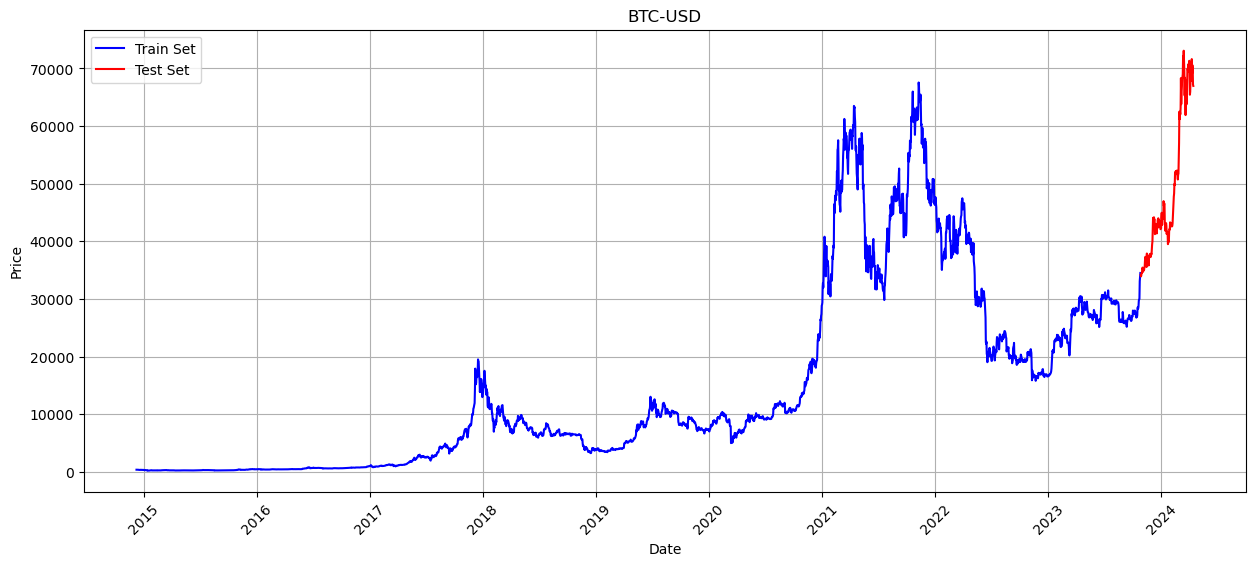

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(X_train, y_train, color='blue', label='Train Set')
plt.plot(X_test, y_test, color='red', label='Test Set')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.title('BTC-USD')
plt.legend()
plt.show()

## Windowing Our Data
**Horizon**: The number of steps we aim to predict in the future.

**Window**: The number of steps we intend to use for prediction.

In [15]:
HORIZON = 1
WINDOW = 7

#### Using `For`

In [16]:
def create_windowed_dataset(data, horizon=HORIZON, window=WINDOW):
    """
    Creates a sliding window dataset from the given data.

    Parameters:
        data (array_like): The input data.
        horizon (int): The number of steps to predict into the future.
        window (int): The size of the window used for prediction.

    Returns:
        tuple: A tuple containing NumPy arrays of features and corresponding targets.
    """
    features = []
    targets = []

    for i in range(len(data) - window - horizon + 1):
        feature_window = data[i:i+window]
        target_window = data[i+window:i+window+horizon]

        features.append(feature_window)
        targets.append(target_window)

    return np.array(features), np.array(targets)


In [17]:
windows, labels = create_windowed_dataset(y_train, horizon=1, window=7)

In [18]:
windows.shape, labels.shape

((3236, 7), (3236, 1))

In [19]:
windows[:3], labels[:3]

(array([[352.218994, 346.36499 , 350.506012, 352.541992, 347.376007,
         351.631989, 345.345001],
        [346.36499 , 350.506012, 352.541992, 347.376007, 351.631989,
         345.345001, 327.062012],
        [350.506012, 352.541992, 347.376007, 351.631989, 345.345001,
         327.062012, 319.776001]]),
 array([[327.062012],
        [319.776001],
        [311.395996]]))

In [20]:
#tf.keras.preprocessing.timeseries_dataset_from_array()

In [21]:
def window_train_test_split(windows, labels, test_split=0.1):

  split_size = int(len(windows) * (1-test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [22]:
train_windows, test_windows, train_labels, test_labels = window_train_test_split(windows=windows, labels=labels)

## Dense Model
> Window = 7 , Horizon = 1

In [23]:
input_shape = train_windows.shape[1:]

In [24]:
inputs = tf.keras.layers.Input(shape=input_shape, batch_size=128)
x = tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu)(inputs)
outputs = tf.keras.layers.Dense(units=HORIZON, activation=tf.keras.activations.linear)(x)

model_1 = tf.keras.Model(inputs, outputs)

In [25]:
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [26]:
model_1.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8525.7197 - mae: 8529.2188 - val_loss: 4005.3633 - val_mae: 3983.3411
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1422.3033 - mae: 1422.4956 - val_loss: 1365.3387 - val_mae: 1366.1825
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 722.9579 - mae: 722.7292 - val_loss: 938.5534 - val_mae: 928.2714
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 685.6740 - mae: 685.6990 - val_loss: 777.1533 - val_mae: 779.1819
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 647.0510 - mae: 647.1799 - val_loss: 668.2627 - val_mae: 661.1265
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 598.4989 - mae: 598.4427 - val_loss: 687.9767 - val_mae: 680.1250
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 607.0895 - mae: 607.2286 - val_loss: 689.3262 - val_mae: 681.7611
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 580.0237 - mae: 579.9756 - val_loss: 606.6861 - val_mae: 

In [28]:
model_1.evaluate(test_windows, test_labels)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 364.2878 - mae: 353.1629 


[444.7496337890625, 378.00018310546875]

## Dense Model 2
> Windwos : 30, horizon : 1

In [29]:
windows_30, labels_30 = create_windowed_dataset(y_train, horizon=1, window=30)

In [30]:
train_windows_30, test_windows_30, train_labels_30, test_labels_30 = window_train_test_split(windows=windows_30, labels=labels_30)

In [31]:
input_shape = train_windows_30.shape[1:]

In [32]:
inputs = tf.keras.layers.Input(shape=input_shape, batch_size=128)

x = tfx = tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu)(inputs)
outputs = tf.keras.layers.Dense(units=1, activation=tf.keras.activations.linear)(x) #units = horizon = 1

model_2 = tf.keras.Model(inputs, outputs)

In [33]:
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [34]:
model_2.fit(train_windows_30, train_labels_30, epochs=100, batch_size=128, validation_data=(test_windows_30, test_labels_30))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1273.8295 - mae: 1274.0365 - val_loss: 878.7769 - val_mae: 908.0773
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 754.2179 - mae: 754.2378 - val_loss: 743.5143 - val_mae: 751.8890
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 736.8690 - mae: 736.8054 - val_loss: 997.1945 - val_mae: 976.8972
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 713.9769 - mae: 714.0818 - val_loss: 831.4173 - val_mae: 815.1469
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 610.1713 - mae: 610.0714 - val_loss: 681.5037 - val_mae: 677.3051
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 618.5485 - mae: 618.4772 - val_loss: 630.1872 - val_mae: 633.4237
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 622.8093 - mae: 622.5466 - val_loss: 618.5500 - val_mae: 625.0049
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 601.5323 - mae: 601.6274 - val_loss: 715.0366 - val_mae: 699.53

In [35]:
model_2.evaluate(test_windows_30, test_labels_30)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 872.6536 - mae: 858.7596 


[1038.830810546875, 955.4669799804688]

## 1D CNN (Conv1D)

In [36]:
HORIZON = 1
WINDOW_SIZE = 14

In [37]:
windows, labels = create_windowed_dataset(y_train, horizon=1, window=14)

In [38]:
train_windows, test_windows, train_labels, test_labels = window_train_test_split(windows=windows, labels=labels)

In [39]:
len(train_windows)

2906

In [40]:
train_windows[0].shape

(14,)

Conv1D needs an extra dimension as input, therefor we need to maniuplate the dimensions

> we'll do it via lambda layer

In [41]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(14,), dtype=float64, numpy=
array([352.218994, 346.36499 , 350.506012, 352.541992, 347.376007,
       351.631989, 345.345001, 327.062012, 319.776001, 311.395996,
       317.842987, 329.955994, 320.842987, 331.885986])>

In [42]:
expand_dim_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [43]:
expand_dim_layer(x).shape

TensorShape([14, 1])

In [44]:
expand_dim_layer(x)

<tf.Tensor: shape=(14, 1), dtype=float32, numpy=
array([[352.219],
       [346.365],
       [350.506],
       [352.542],
       [347.376],
       [351.632],
       [345.345],
       [327.062],
       [319.776],
       [311.396],
       [317.843],
       [329.956],
       [320.843],
       [331.886]], dtype=float32)>

In [46]:
inputs = tf.keras.layers.Input(shape=train_windows[0].shape, batch_size=128)

x = expand_dim_layer(inputs) # this layer we defined it above
x = tf.keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal')(x) #causal for timeseries
outputs = tf.keras.layers.Dense(units=HORIZON, activation=tf.keras.activations.linear)(x)

model_3 = tf.keras.Model(inputs, outputs)

In [47]:
model_3.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [48]:
model_3.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8850.4404 - mae: 8853.9883 - val_loss: 2308.5173 - val_mae: 2293.9419
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1388.3662 - mae: 1388.7166 - val_loss: 1140.3859 - val_mae: 1139.5309
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 976.9211 - mae: 977.0814 - val_loss: 1003.7879 - val_mae: 1006.3533
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 835.7485 - mae: 835.5319 - val_loss: 1037.2350 - val_mae: 1045.0312
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 826.0972 - mae: 826.2773 - val_loss: 864.3325 - val_mae: 857.2183
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 698.3510 - mae: 698.3592 - val_loss: 736.8777 - val_mae: 731.2942
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 615.7493 - mae: 615.6760 - val_loss: 783.8669 - val_mae: 789.6265
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 594.5355 - mae: 594.4392 - val_loss: 834.2315 - val_m

In [49]:
model_3.evaluate(test_windows, test_labels)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 583.5425 - mae: 562.4871 


[740.6124877929688, 614.27978515625]

## LSTM (RNN)

In [50]:
windows, labels = create_windowed_dataset(y_train, horizon=1, window=14)

In [51]:
train_windows, test_windows, train_labels, test_labels = window_train_test_split(windows=windows, labels=labels)

**note**: Don't forget to change activation of LSTM layers to `relu` becasue their default activation is `tanh` and it doesn't work on our data.

In [53]:
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE,))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)

x = tf.keras.layers.LSTM(units=128, return_sequences=True, activation='relu')(x)
x = tf.keras.layers.LSTM(units=128, activation='relu')(x)

x = tf.keras.layers.Dense(units=64, activation='relu')(x)

outputs = tf.keras.layers.Dense(units=HORIZON, activation='linear')(x)

model_4 = tf.keras.Model(inputs, outputs)

In [55]:
model_4.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [56]:
model_4.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 12623.9268 - mae: 12627.1025 - val_loss: 14515.6963 - val_mae: 14390.7666
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3928.7102 - mae: 3929.5222 - val_loss: 2895.6545 - val_mae: 2877.9565
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1208.6613 - mae: 1208.7739 - val_loss: 1116.9178 - val_mae: 1130.8273
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 920.0720 - mae: 920.1323 - val_loss: 994.1849 - val_mae: 995.4474
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 862.4839 - mae: 862.3969 - val_loss: 1024.9525 - val_mae: 1036.1298
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 848.1360 - mae: 848.1973 - val_loss: 918.6912 - val_mae: 919.3325
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 796.5236 - mae: 796.2192 - val_loss: 1110.7061 - val_mae: 1118.4207
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 845.7463 - mae: 845.7543 - val_loss: 8

In [57]:
model_4.evaluate(test_windows, test_labels)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 388.9699 - mae: 369.7593 


[507.79119873046875, 392.52752685546875]

## Making Multivariate dataset

In [58]:
df.head(6)

,Close
Date,
2014-12-09,352.218994
2014-12-10,346.364990
2014-12-11,350.506012
2014-12-12,352.541992
2014-12-13,347.376007
2014-12-14,351.631989


In [59]:
block_reward_1 = 25     #8th Nov 2012
block_reward_2 = 12.5   #9th Jul 2016
block_reward_3 = 6.25   #18th May 2020
block_reward_4 = 3.125  #20th April 2024

In [60]:
import datetime

df['block_reward'] = 0
df.loc[(df.index > '2012-11-08') & (df.index <= '2016-07-09'), 'block_reward'] = block_reward_1
df.loc[(df.index > '2016-07-09') & (df.index <= '2020-05-18'), 'block_reward'] = block_reward_2
df.loc[(df.index > '2020-05-18') & (df.index <= '2024-04-20'), 'block_reward'] = block_reward_3

C:\Users\X\AppData\Local\Temp\ipykernel_6688\3807077206.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df.index > '2016-07-09') & (df.index <= '2020-05-18'), 'block_reward'] = block_reward_2


In [61]:
df.head()

,Close,block_reward
Date,,
2014-12-09,352.218994,25.0
2014-12-10,346.364990,25.0
2014-12-11,350.506012,25.0
2014-12-12,352.541992,25.0
2014-12-13,347.376007,25.0


In [62]:
df.tail()

,Close,block_reward
Date,,
2024-04-09,69139.015625,6.25
2024-04-10,70587.882813,6.25
2024-04-11,70060.609375,6.25
2024-04-12,67195.867188,6.25
2024-04-13,66972.726563,6.25


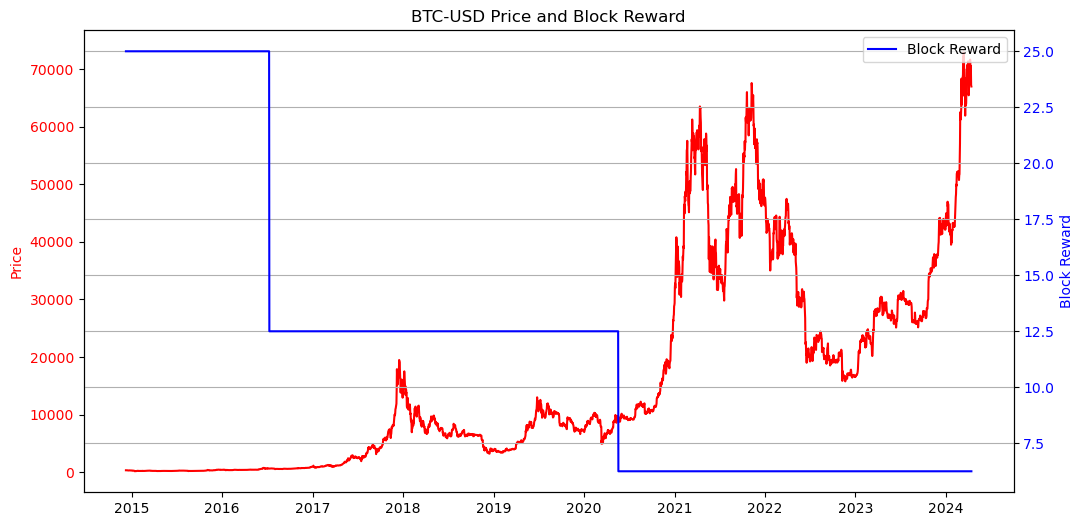

In [63]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df.Close, color='red', label='Price')
ax1.set_ylabel('Price', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(df.index, df.block_reward, color='blue', label='Block Reward')
ax2.set_ylabel('Block Reward', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('BTC-USD Price and Block Reward')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

## Making windowed dataset for Multivariate data
with `pandas shift method`

In [64]:
df_windowed = df.copy()

In [65]:
df_windowed.head()

,Close,block_reward
Date,,
2014-12-09,352.218994,25.0
2014-12-10,346.364990,25.0
2014-12-11,350.506012,25.0
2014-12-12,352.541992,25.0
2014-12-13,347.376007,25.0


In [66]:
for i in range(WINDOW_SIZE):
  df_windowed[f"Price+{i+1}"] = df_windowed["Close"].shift(periods=i+1)

In [67]:
df_windowed.head(10)

,Close,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8,Price+9,Price+10,Price+11,Price+12,Price+13,Price+14
Date,,,,,,,,,,,,,,,,
2014-12-09,352.218994,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-10,346.364990,25.0,352.218994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11,350.506012,25.0,346.364990,352.218994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12,352.541992,25.0,350.506012,346.364990,352.218994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-13,347.376007,25.0,352.541992,350.506012,346.364990,352.218994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-14,351.631989,25.0,347.376007,352.541992,350.506012,346.364990,352.218994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-15,345.345001,25.0,351.631989,347.376007,352.541992,350.506012,346.364990,352.218994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-16,327.062012,25.0,345.345001,351.631989,347.376007,352.541992,350.506012,346.364990,352.218994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-17,319.776001,25.0,327.062012,345.345001,351.631989,347.376007,352.541992,350.506012,346.364990,352.218994,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_windowed.tail()

,Close,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8,Price+9,Price+10,Price+11,Price+12,Price+13,Price+14
Date,,,,,,,,,,,,,,,,
2024-04-09,69139.015625,6.25,71631.359375,69362.554688,68896.109375,67837.640625,68508.843750,65980.812500,65446.972656,69702.148438,71333.648438,69645.304688,69892.828125,70744.953125,69455.343750,69987.835938
2024-04-10,70587.882813,6.25,69139.015625,71631.359375,69362.554688,68896.109375,67837.640625,68508.843750,65980.812500,65446.972656,69702.148438,71333.648438,69645.304688,69892.828125,70744.953125,69455.343750
2024-04-11,70060.609375,6.25,70587.882813,69139.015625,71631.359375,69362.554688,68896.109375,67837.640625,68508.843750,65980.812500,65446.972656,69702.148438,71333.648438,69645.304688,69892.828125,70744.953125
2024-04-12,67195.867188,6.25,70060.609375,70587.882813,69139.015625,71631.359375,69362.554688,68896.109375,67837.640625,68508.843750,65980.812500,65446.972656,69702.148438,71333.648438,69645.304688,69892.828125
2024-04-13,66972.726563,6.25,67195.867188,70060.609375,70587.882813,69139.015625,71631.359375,69362.554688,68896.109375,67837.640625,68508.843750,65980.812500,65446.972656,69702.148438,71333.648438,69645.304688


## Creating X(Windows) and Y(Horizons)

In [69]:
X = df_windowed.dropna().drop('Close', axis=1).astype('float32') #dropping Close column bcz we have price columns now(we shifted) and now it is our target
y = df_windowed.dropna()['Close'].astype('float32')

In [70]:
X.head(3)

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8,Price+9,Price+10,Price+11,Price+12,Price+13,Price+14
Date,,,,,,,,,,,,,,,
2014-12-23,25.0,331.885986,320.842987,329.955994,317.842987,311.395996,319.776001,327.062012,345.345001,351.631989,347.376007,352.541992,350.506012,346.364990,352.218994
2014-12-24,25.0,334.571991,331.885986,320.842987,329.955994,317.842987,311.395996,319.776001,327.062012,345.345001,351.631989,347.376007,352.541992,350.506012,346.364990
2014-12-25,25.0,322.533997,334.571991,331.885986,320.842987,329.955994,317.842987,311.395996,319.776001,327.062012,345.345001,351.631989,347.376007,352.541992,350.506012


In [71]:
y.head(3)

Date
2014-12-23    334.571991
2014-12-24    322.533997
2014-12-25    319.007996
Name: Close, dtype: float32

## Splitting data to Train/Test sets

In [72]:
SPLIT_SIZE = int(len(X)*0.9)
SPLIT_SIZE

3060

In [73]:
X_train = X[:SPLIT_SIZE]
y_train = y[:SPLIT_SIZE]

In [74]:
X_test = X[SPLIT_SIZE:]
y_test = y[SPLIT_SIZE:]

## Multi inputs model

In [78]:
input_1 = X_train['block_reward'].values
input_2 = X_train.drop('block_reward', axis=1).values

In [79]:
input_1[0].shape, input_2[0].shape

((), (14,))

In [81]:
# Step 1: Define Input Layers
inputs_1 = tf.keras.layers.Input(shape=())  # Scalar input
inputs_2 = tf.keras.layers.Input(shape=(14,))  # 1D array with 14 elements

# Step 2: Expand Dimension of Input 1
inputs_1_expanded = tf.expand_dims(inputs_1, axis=-1)  # Add an extra dimension

# Step 3: Concatenate Inputs
concatenated_inputs = tf.keras.layers.Concatenate()([inputs_1_expanded, inputs_2])

# Step 4: Define Model Architecture
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(concatenated_inputs)
x = tf.keras.layers.GRU(units=128, return_sequences=True, activation='relu')(x)
x = tf.keras.layers.GRU(units=128, activation='relu')(x)
x = tf.keras.layers.Dense(units=64, activation='relu')(x)

# Step 5: Define Output Layer
outputs = tf.keras.layers.Dense(units=HORIZON, activation='linear')(x)  # HORIZON is the number of time steps to forecast

# Step 6: Create Model
model_5 = tf.keras.Model([inputs_1, inputs_2], outputs)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [ ]:
model_5.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [ ]:
model_5.fit([input_1, input_2], y_train, epochs=100, batch_size=128)

In [ ]:
input_1_test = X_test['block_reward'].values
input_2_test = X_test.drop('block_reward', axis=1).values

In [ ]:
model_5.evaluate([input_1_test, input_2_test], y_test)